In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sympy import diff,solve,Eq

<h2>
U-235 Spectra
</h2>

Load predicted antineutrino spectra for U-235 according beta spectra from ILL paper [1] and fit on that with chi-squared method. Hence we have spectra function per energy.

In [3]:
ILL_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/1985Schreckenbach_N_nu_E_235U.csv')
E_ILL_235U, N_ILL_235U, err_ILL_235U = ILL_235U['E'], ILL_235U['N_nu'], ILL_235U['err_tot']
#ILL_235U.head()

<div dir= "rtl" align="right">
در این قسمت سعی می‌کنیم تا بر روی داده‌های آنتی‌نوترینوی بدست آمده از طریق آی ال ال به روش توان دو کای از مرتبه‌ی پنج برازش انجام دهیم و یک تابعی از انرژی برای طیف بدست بیاوریم 
</div>
<div dir= "rtl" align="right">
برای این کار تابع توان دو کای را می‌سازیم و نسبت به ضرایب مشتق گرفته و همه آنها را برابر صفر قرار می‌دهیم تا ضرایبی را که با آن تابع کمینه می‌شود بیابیم 
</div>

In [3]:
from sympy.abc import a,b,c,d,e,f
chi_sq = []

for i in range (len(N_ILL_235U)):
    chi_sq.append(((np.log(N_ILL_235U[i]) - (a + b*(E_ILL_235U[i]) + c*(E_ILL_235U[i])**2 + d*(E_ILL_235U[i])**3 + e*(E_ILL_235U[i])**4+f*(E_ILL_235U[i])**5))/np.log((err_ILL_235U[i]*N_ILL_235U[i])/100))**2)
    i += 1
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a))
eq2 = Eq(diff(chi_sq,b))
eq3 = Eq(diff(chi_sq,c))
eq4 = Eq(diff(chi_sq,d))
eq5 = Eq(diff(chi_sq,e))
eq6 = Eq(diff(chi_sq,f))
sol = solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))
a_0_235U, a_1_235U, a_2_235U, a_3_235U, a_4_235U,a_5_235U = np.float(sol[a]), np.float(sol[b]), np.float(sol[c]), np.float(sol[d]), np.float(sol[e]), np.float(sol[f])

<div dir= "rtl" align="right">
داده‌های طیف آنتی‌نوترینوی اندازه‌گیری شده توسط آشکارساز دایابای نیز در مقاله ذیل به صورت جداگانه برای اورانیوم-۲۳۵ استخراج شده و ما از داده‌های موجود در تصویر ۲ استفاده خواهیم کرد 
</div>
<a href="https://sci-hub.se/https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.123.111801" target="_blank">Adey, D., et al. (2019). Extraction of the 235-U and 239-Pu Antineutrino Spectra at Daya Bay.</a>
<div dir= "rtl" align="right">
توجه شود که داده‌های مربوطه به ازای سوختن ۱ ام ای وی و در طول ۲۴ ساعت است لذا برای مقایسه با داده‌های ای ال ال تقسیم بر دو باید شود 
</div>

In [4]:
DYB_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2019Adey_N_nu_E_235U.csv')
E_DYB_235U, N_DYB_235U = DYB_235U['E'], DYB_235U['N_nu']/2
DYB_235U.head()

,E,N_nu
0,0.849549,0.094109
1,1.120361,0.364829
2,1.373119,0.670914
3,1.619860,0.953441
4,1.872618,1.253634


<div dir= "rtl" align="right">
داده‌های طیف آنتی‌نوترینوی اندازه‌گیری شده توسط آشکارساز دیگر نیز در مقاله ذیل به صورت جداگانه برای اورانیوم-۲۳۵ استخراج شده و ما از داده‌های موجود در تصویر ۵ استفاده خواهیم کرد 
</div>
<a href="https://arxiv.org/pdf/1812.10877.pdf" target="_blank">Ashenfelter, J., et al. (2018). Measurement of the Antineutrino Spectrum from 235-U Fission at HFIR with PROSPECT</a>
<div dir= "rtl" align="right">
توجه شود که داده‌های مربوطه به ازای سوختن ۱ ام ای وی و در طول ۲۴ ساعت است لذا برای مقایسه با داده‌های ای ال ال تقسیم بر دو باید شود 
<br>
از طرف دیگر توجه شود که داده‌های ذکر شده بر حسب دویست کیلو الکترون ولت هستند و باید بر حسب یک شکافت یعنی حدود دویست و سه مگا الکترون ولت و یک مگا الترون ولت بهنجارش شوند
</div>

In [5]:
PROSPECT_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2018Ashenfelter_N_nu_E_235U.csv')
E_PROSPECT_235U, N_PROSPECT_235U = PROSPECT_235U['E'], ((202.36*1000)/200)*PROSPECT_235U['N_nu']*10**-6/2
PROSPECT_235U.head()

,N_nu,E
0,611.418048,0.898990
1,1119.705341,1.101010
2,1226.519337,1.303030
3,1464.088398,1.501443
4,1777.163904,1.699856


<div dir= "rtl" align="right">
حال با توجه به تابعی که از داده‌های ای ال ال آنرا ساخته ایم در انرژی‌هایی که از مشاهد در آن داده گرفتیم، نتیجه بدست آمده از آی ال ال را پیدا می‌کنیم سپس داده‌های اندازه‌گیری شده را بر آن تقسیم می‌کنیم که در نمودار به صورت واضح مشاهده می‌شود 
</div>

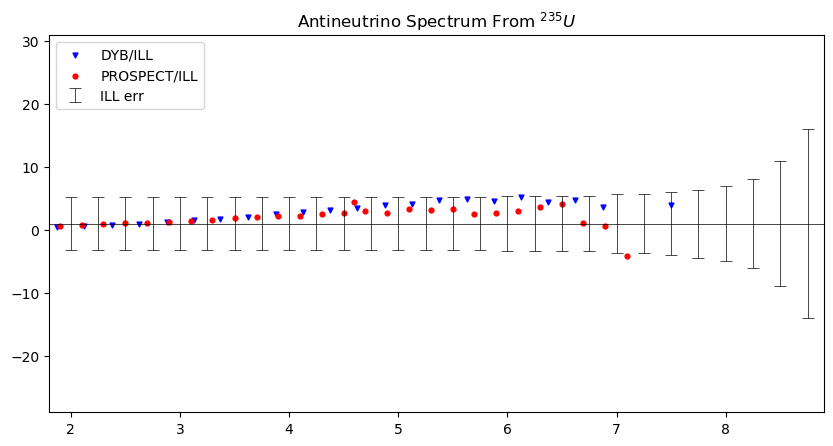

In [6]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(1.8,8.9)
plt.ylim(1-30,1+30)

plt.scatter(E_DYB_235U, (N_DYB_235U)/np.exp(a_0_235U+a_1_235U*E_DYB_235U+a_2_235U*E_DYB_235U**2+a_3_235U*E_DYB_235U**3+a_4_235U*E_DYB_235U**4+a_5_235U*E_DYB_235U**5), label="DYB/ILL", c='b', marker='v', s=12)
plt.scatter(E_PROSPECT_235U, (N_PROSPECT_235U)/np.exp(a_0_235U+a_1_235U*E_PROSPECT_235U+a_2_235U*E_PROSPECT_235U**2+a_3_235U*E_PROSPECT_235U**3+a_4_235U*E_PROSPECT_235U**4+a_5_235U*E_PROSPECT_235U**5), label="PROSPECT/ILL", c='r', s=12)

plt.errorbar(E_ILL_235U, (N_ILL_235U/N_ILL_235U), yerr=(err_ILL_235U), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5, label="ILL err")
plt.axhline(y=1, color='black', linestyle='-',linewidth=0.5)

plt.title('Antineutrino Spectrum From ''$^{235}U $')
plt.legend()
plt.show()

<h2 dir="rtl" align="right">
پلوتونیوم ۲۳۹ 
</h2>

<div dir= "rtl" align="right">
به طور مشابه همان کارها را برای داده‌های مقاله ذیل که مربوط به پلوتونیم-۲۳۹ می‌باشد انجام می‌دهیم
</div>
<a href="https://sci-hub.se/https://www.sciencedirect.com/science/article/abs/pii/0370269389915980">Hahn, A. A., et al. (1989). Antineutrino spectra from 241-Pu and 239-Pu thermal neutron fission products.</a>
<div dir= "rtl" align="right">
توجه شود که داده‌های مربوطه به ازای سوختن ۱ ام ای وی و در طول ۱۲ ساعت است 
</div>

In [7]:
ILL_239Pu = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/1989Hahn_N_nu_E_239Pu.csv')
E_ILL_239Pu, N_ILL_239Pu, err_ILL_239Pu = ILL_239Pu['E'], ILL_239Pu['N_nu'], ILL_239Pu['err_tot']
ILL_239Pu.head()

,E,N_nu,err,err_tot
0,1.50,1.45,0,5.2
1,1.75,1.26,0,5.2
2,2.00,1.07,0,4.5
3,2.25,0.89,0,4.5
4,2.50,0.71,0,4.3


<div dir= "rtl" align="right">
در این قسمت سعی می‌کنیم تا بر روی داده‌های آنتی‌نوترینوی بدست آمده از طریق آی ال ال به روش توان دو کای از مرتبه‌ی پنج برازش انجام دهیم و یک تابعی از انرژی برای طیف بدست بیاوریم 
</div>
<div dir= "rtl" align="right">
برای این کار تابع توان دو کای را می‌سازیم و نسبت به ضرایب مشتق گرفته و همه آنها را برابر صفر قرار می‌دهیم تا ضرایبی را که با آن تابع کمینه می‌شود بیابیم 
</div>

In [8]:
from sympy.abc import a,b,c,d,e,f
chi_sq = []

for i in range (len(N_ILL_239Pu)):
    chi_sq.append(((np.log(N_ILL_239Pu[i]) - (a + b*(E_ILL_239Pu[i]) + c*(E_ILL_239Pu[i])**2 + d*(E_ILL_239Pu[i])**3 + e*(E_ILL_239Pu[i])**4+f*(E_ILL_239Pu[i])**5))/np.log((err_ILL_239Pu[i]*N_ILL_239Pu[i])/100))**2)
    i += 1
    
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a))
eq2 = Eq(diff(chi_sq,b))
eq3 = Eq(diff(chi_sq,c))
eq4 = Eq(diff(chi_sq,d))
eq5 = Eq(diff(chi_sq,e))
eq6 = Eq(diff(chi_sq,f))
sol = solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))
a_0_239Pu, a_1_239Pu, a_2_239Pu, a_3_239Pu, a_4_239Pu,a_5_239Pu = np.float(sol[a]), np.float(sol[b]), np.float(sol[c]), np.float(sol[d]), np.float(sol[e]), np.float(sol[f])

<div dir= "rtl" align="right">
داده‌های طیف آنتی‌نوترینوی اندازه‌گیری شده توسط آشکارساز دایابای نیز در مقاله ذیل به صورت جداگانه برای پلوتونیوم-۲۳۹ استخراج شده و ما از داده‌های موجود در تصویر ۲ استفاده خواهیم کرد 
</div>
<a href="https://sci-hub.se/https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.123.111801" target="_blank">Adey, D., et al. (2019). Extraction of the 235-U and 239-Pu Antineutrino Spectra at Daya Bay.</a>
<div dir= "rtl" align="right">
توجه شود که داده‌های مربوطه به ازای سوختن ۱ ام ای وی و در طول ۲۴ ساعت است لذا برای مقایسه با داده‌های ای ال ال تقسیم بر دو باید شود 
</div>

In [9]:
DYB_239Pu = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2019Adey_N_nu_E_239Pu.csv')
E_DYB_239Pu, N_DYB_239Pu = DYB_239Pu['E'], DYB_239Pu['N_nu']/2
DYB_239Pu.head()

,E,N_nu
0,0.849549,0.041089
1,1.126379,0.311804
2,1.373119,0.629677
3,1.625878,0.903361
4,1.872618,1.073958


<div dir= "rtl" align="right">
حال با توجه به تابعی که از داده‌های ای ال ال آنرا ساخته ایم در انرژی‌هایی که از مشاهد در آن داده گرفتیم، نتیجه بدست آمده از آی ال ال را پیدا می‌کنیم سپس داده‌های اندازه‌گیری شده را بر آن تقسیم می‌کنیم که در نمودار به صورت واضح مشاهده می‌شود 
</div>

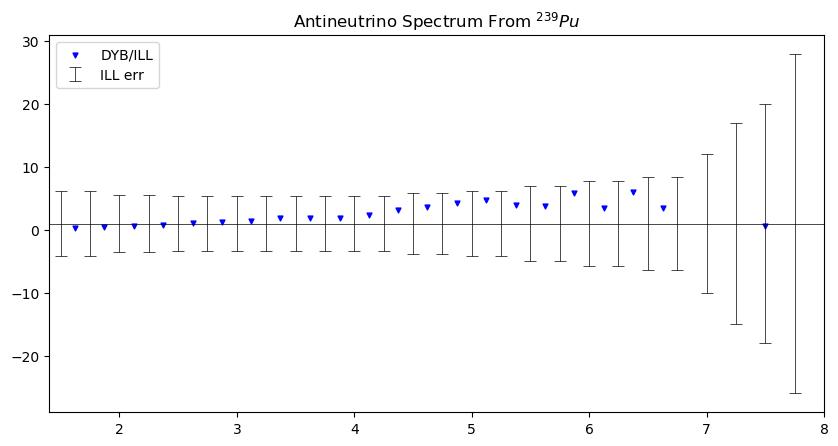

In [10]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(1.4,8)
plt.ylim(1-30,1+30)

plt.scatter(E_DYB_239Pu, (N_DYB_239Pu)/np.exp(a_0_239Pu+a_1_239Pu*E_DYB_239Pu+a_2_239Pu*E_DYB_239Pu**2+a_3_239Pu*E_DYB_239Pu**3+a_4_239Pu*E_DYB_239Pu**4+a_5_239Pu*E_DYB_239Pu**5), label="DYB/ILL", c='b', marker='v', s=12)

plt.errorbar(E_ILL_239Pu, (N_ILL_239Pu/N_ILL_239Pu), yerr=(err_ILL_239Pu), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5, label="ILL err")
plt.axhline(y=1, color='black', linestyle='-',linewidth=0.5)

plt.title('Antineutrino Spectrum From ''$^{239}Pu $')
plt.legend()
plt.show()

[1]
<a href="https://sci-hub.se/https://www.sciencedirect.com/science/article/abs/pii/0370269385913371"> Schreckenbach, K. et al. (1985). Determination of the antineutrino spectrum from 235-U thermal neutron fission products up to 9.5 MeV.</a>